# Pronosoft Football Data - Viz

---

---

# Import Lib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import sqlite3

import warnings
warnings.filterwarnings('ignore')

---

# Paths

In [2]:
path_pronosoft_data = '..\Data\pronosoft_data.csv'
path_pronosoft_data_extended = '..\Data\pronosoft_data_extended.csv'

name_database = 'Football_Data.sqlite'
path_database = '..\\SQL\\' + name_database

folder_figure = '..\Figures'

---

# Functions

Get Match Outcome Vs Probability of winning

In [3]:
# Accuracy of Percentage Predictions

def get_outcome_vs_perc(col_team_1_prob, col_nul_prob, col_team_2_prob, col_match_outcome):
    win_perc = np.zeros(100)
    team_1_win_perc = np.zeros(100)
    nul_win_perc = np.zeros(100)
    team_2_win_perc = np.zeros(100)

    total_perc = np.zeros(100)
    team_1_total_perc = np.zeros(100)
    nul_total_perc = np.zeros(100)
    team_2_total_perc = np.zeros(100)

    for idx in range(num_matches):
        team_1_prob = int(100*col_team_1_prob[idx])
        nul_prob = int(100*col_nul_prob[idx])
        team_2_prob = int(100*col_team_2_prob[idx])
        match_prob = {'1': team_1_prob, 'N': nul_prob, '2': team_2_prob}

        match_outcome = col_match_outcome[idx]

        # Update win_perc & total_perc
        win_perc[match_prob[match_outcome]] += 1
        total_perc[match_prob['1']] += 1
        total_perc[match_prob['2']] += 1
        total_perc[match_prob['N']] += 1

        if match_outcome == '1':
            team_1_win_perc[match_prob[match_outcome]] += 1

        elif match_outcome == 'N':
            nul_win_perc[match_prob[match_outcome]] += 1

        elif match_outcome == '2':
            team_2_win_perc[match_prob[match_outcome]] += 1

        team_1_total_perc[match_prob['1']] += 1
        nul_total_perc[match_prob['N']] += 1
        team_2_total_perc[match_prob['2']] += 1


    # Accuracy for Team 1, nul, Team 2 percentages & total
    team_1_perc_of_win_perc = np.nan_to_num(team_1_win_perc/team_1_total_perc)
    nul_perc_of_win_perc = np.nan_to_num(nul_win_perc/nul_total_perc)
    team_2_perc_of_win_perc = np.nan_to_num(team_2_win_perc/team_2_total_perc)
    perc_of_win_perc = np.nan_to_num(win_perc/total_perc)
        
    return team_1_perc_of_win_perc, nul_perc_of_win_perc, team_2_perc_of_win_perc, perc_of_win_perc

Query to Dataframe

In [4]:
def query_to_df(database, query):
    conn = sqlite3.connect(database)  
    c = conn.cursor()
    c.execute(query)
    
    # EXTRACT DATAFRAME
    fields = [description[0] for description in c.description]
    query_df = pd.DataFrame(c.fetchall(), columns = fields)
    
    conn.close()
    
    return query_df

---

---

# Import CSV to Dataframe

In [5]:
df = pd.read_csv(path_pronosoft_data_extended)
df.head()

,date,league,time,team_1_name,team_2_name,team_1_prob,team_1_prob_from_odds,team_1_bet_odds,team_1_ev,nul_prob,...,under_bet_odds,under_ev,over_prob,over_bet_odds,over_ev,prediction_uo_pronosoft,prediction_uo_pronosoft_outcome,team_1_score,team_2_score,match_outcome
0,01-10-2018,France - Ligue 2,20:45,Troyes,Auxerre,0.39,0.35,2.75,0.07,0.18,...,1.46,-0.01,0.32,2.00,-0.36,U,1.0,1,0,1
1,01-10-2018,Espagne - Liga Espagnole,21:00,Celta Vigo,Getafe,0.33,0.44,2.15,-0.29,0.38,...,1.53,-0.22,0.49,1.88,-0.08,NaN,NaN,1,1,N
2,01-10-2018,Angleterre - Premier League,21:00,Bournemouth,Crystal Palace,0.39,0.43,2.20,-0.14,0.25,...,1.85,-0.26,0.60,1.65,-0.01,O,1.0,2,1,1
3,01-10-2018,Italie - Serie A,20:30,Sampdoria,Spal,0.41,0.54,1.72,-0.29,0.25,...,1.67,-0.05,0.43,1.85,-0.20,NaN,NaN,2,1,1
4,01-10-2018,Portugal - Primeira Liga,21:15,Aves,Portimonense,0.40,0.35,2.60,0.04,0.30,...,1.66,0.15,0.31,1.73,-0.46,U,0.0,3,0,1


---

---

# Analysis

In [6]:
num_matches = len(df)
print(f'Num. of matches: {num_matches}')

Num. of matches: 52255


In [7]:
# Analysing Pronosoft Prognosis / Predictions 

predictions_team = np.array(df['prediction_team_pronosoft_outcome']) 
predictions_team = [x for x in predictions_team if pd.isna(x) == False]
predictions_uo = np.array(df['prediction_uo_pronosoft_outcome']) 
predictions_uo = [x for x in predictions_uo if pd.isna(x) == False]

num_predictions_team = len(predictions_team)
accuracy_predictions_team = np.round(100 * np.mean(predictions_team), 2)
num_predictions_uo = len(predictions_uo)
accuracy_predictions_uo = np.round(100 * np.mean(predictions_uo), 2)

print('\nPronosoft Predictions Team Win & Under/Over 2.5 score\n') 
print('   Num. Team  ', num_predictions_team)
print('   Acc. Team  ', accuracy_predictions_team, '%\n')
print('   Num. U/O   ', num_predictions_uo)
print('   Acc. U/O   ', accuracy_predictions_uo, '%\n')


Pronosoft Predictions Team Win & Under/Over 2.5 score

   Num. Team   26021
   Acc. Team   56.66 %

   Num. U/O    29970
   Acc. U/O    55.71 %



---

## Pie Chart | Proportion of Outcomes

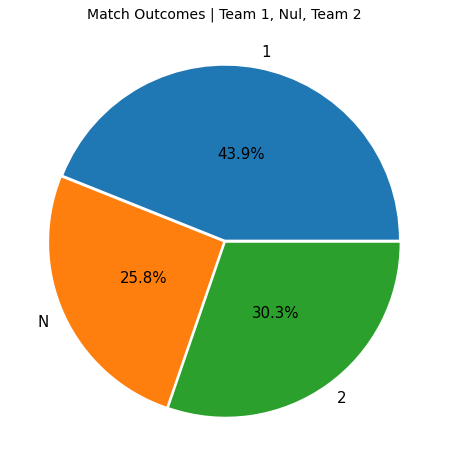

In [8]:
# PIE CHART | Type of matches

match_outcome = list(df['match_outcome'])

count_1 = match_outcome.count('1')
count_N = match_outcome.count('N') 
count_2 = match_outcome.count('2') 


pie, ax = plt.subplots(figsize = (10, 8))

y = np.array([count_1, count_N, count_2])
labels = ['1', 'N', '2']

plt.pie(x = y, autopct = "%.1f%%", explode = len(y) * [0.01], labels = labels, pctdistance = 0.5, textprops = {'fontsize': 15})
plt.title('Match Outcomes | Team 1, Nul, Team 2', fontsize = 14)
pie.savefig(folder_figure + '\Proportion of Outcomes.png')
plt.show()

---

## Plot | Actual Outcome of matches Vs Prediction [%] of winning from Pronosoft

In [9]:
team_1_outcome_vs_perc, nul_outcome_vs_perc, team_2_outcome_vs_perc, outcome_vs_perc = get_outcome_vs_perc(df['team_1_prob'], df['nul_prob'], df['team_2_prob'], df['match_outcome'])

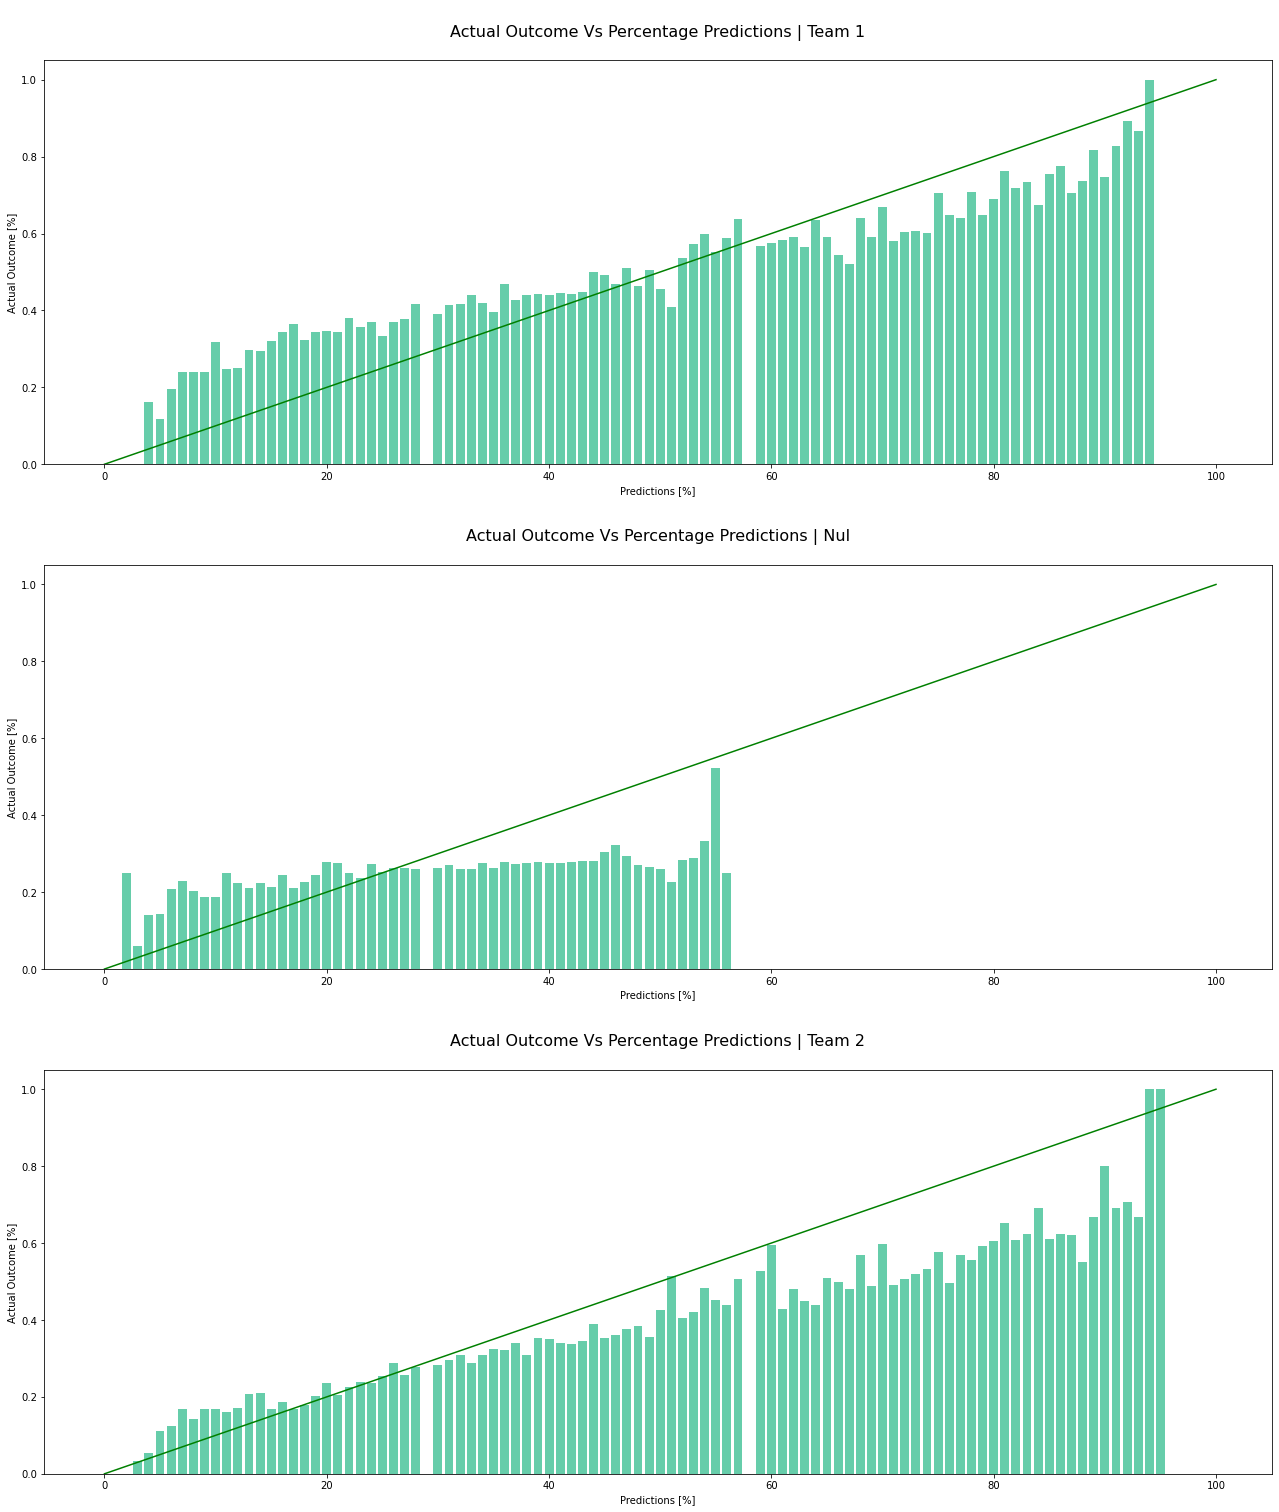

In [10]:
# Actual Outcome of Percentage Predictions | All 3 outcomes: Team 1, nul, Team 2

perc = range(100)    
fontsize = 16

fig, axs = plt.subplots(3, 1, figsize = (22, 26))
axs[0].bar(perc, team_1_outcome_vs_perc, color = 'mediumaquamarine')
axs[0].plot([0, 100], [0, 1], color = 'g')
axs[0].set_title('\nActual Outcome Vs Percentage Predictions | Team 1\n', fontsize = fontsize)
axs[0].set_xlabel('Predictions [%]')
axs[0].set_ylabel('Actual Outcome [%]')

axs[1].bar(perc, nul_outcome_vs_perc, color = 'mediumaquamarine')
axs[1].plot([0, 100], [0, 1], color = 'g')
axs[1].set_title('\nActual Outcome Vs Percentage Predictions | Nul\n', fontsize = fontsize)
axs[1].set_xlabel('Predictions [%]')
axs[1].set_ylabel('Actual Outcome [%]')

axs[2].bar(perc, team_2_outcome_vs_perc, color = 'mediumaquamarine')
axs[2].plot([0, 100], [0, 1], color = 'g')
axs[2].set_title('\nActual Outcome Vs Percentage Predictions | Team 2\n', fontsize = fontsize)
axs[2].set_xlabel('Predictions [%]')
axs[2].set_ylabel('Actual Outcome [%]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

plt.savefig(folder_figure + '\Actual Outcome Vs Percentage Predictions - Team 1, Nul, Team 2.png')
plt.show()

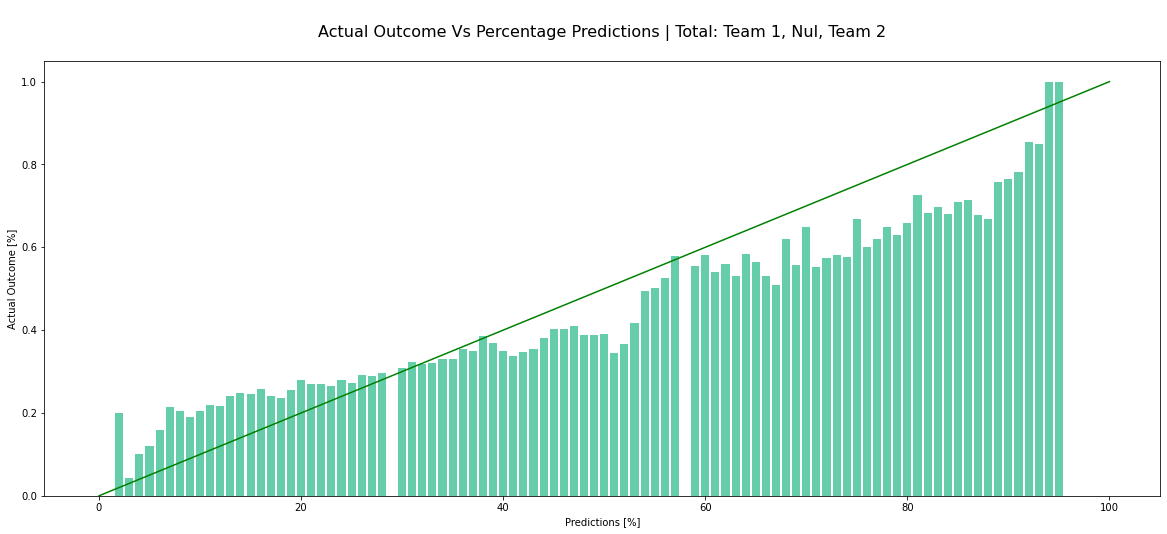

In [12]:
# Actual Outcome of Percentage Predictions | Total for all 3 outcomes: Team 1, nul, Team 2

perc = range(100)    

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(perc, outcome_vs_perc, color = 'mediumaquamarine')
ax.plot([0, 100], [0, 1], color = 'g')
ax.set_title('\nActual Outcome Vs Percentage Predictions | Total: Team 1, Nul, Team 2\n', fontsize = fontsize)
ax.set_xlabel('Predictions [%]')
ax.set_ylabel('Actual Outcome [%]')

plt.savefig(folder_figure + '\Actual Outcome Vs Percentage Predictions.png')
plt.show()

---

## Plot | Actual Outcome of matches Vs Percentage of winning from Odds

We can calculate the Probability of Outcome from Betting Odds, which reflects Bookmakers belief & predictions about outcomes. 

Here is an example for Team 1:

\begin{equation*}
Prob\ (Team\_1) =
\frac{1} { Team\_1\_odd \times(\frac{1}{Team\_1\_odd} + \frac{1}{Nul\_odd} + \frac{1}{Team\_2\_odd})}
\end{equation*}

In [15]:
team_1_outcome_vs_odds, nul_outcome_vs_odds, team_2_outcome_vs_odds, outcome_vs_odds = get_outcome_vs_perc(df['team_1_prob_from_odds'], df['nul_prob_from_odds'], df['team_2_prob_from_odds'], df['match_outcome'])

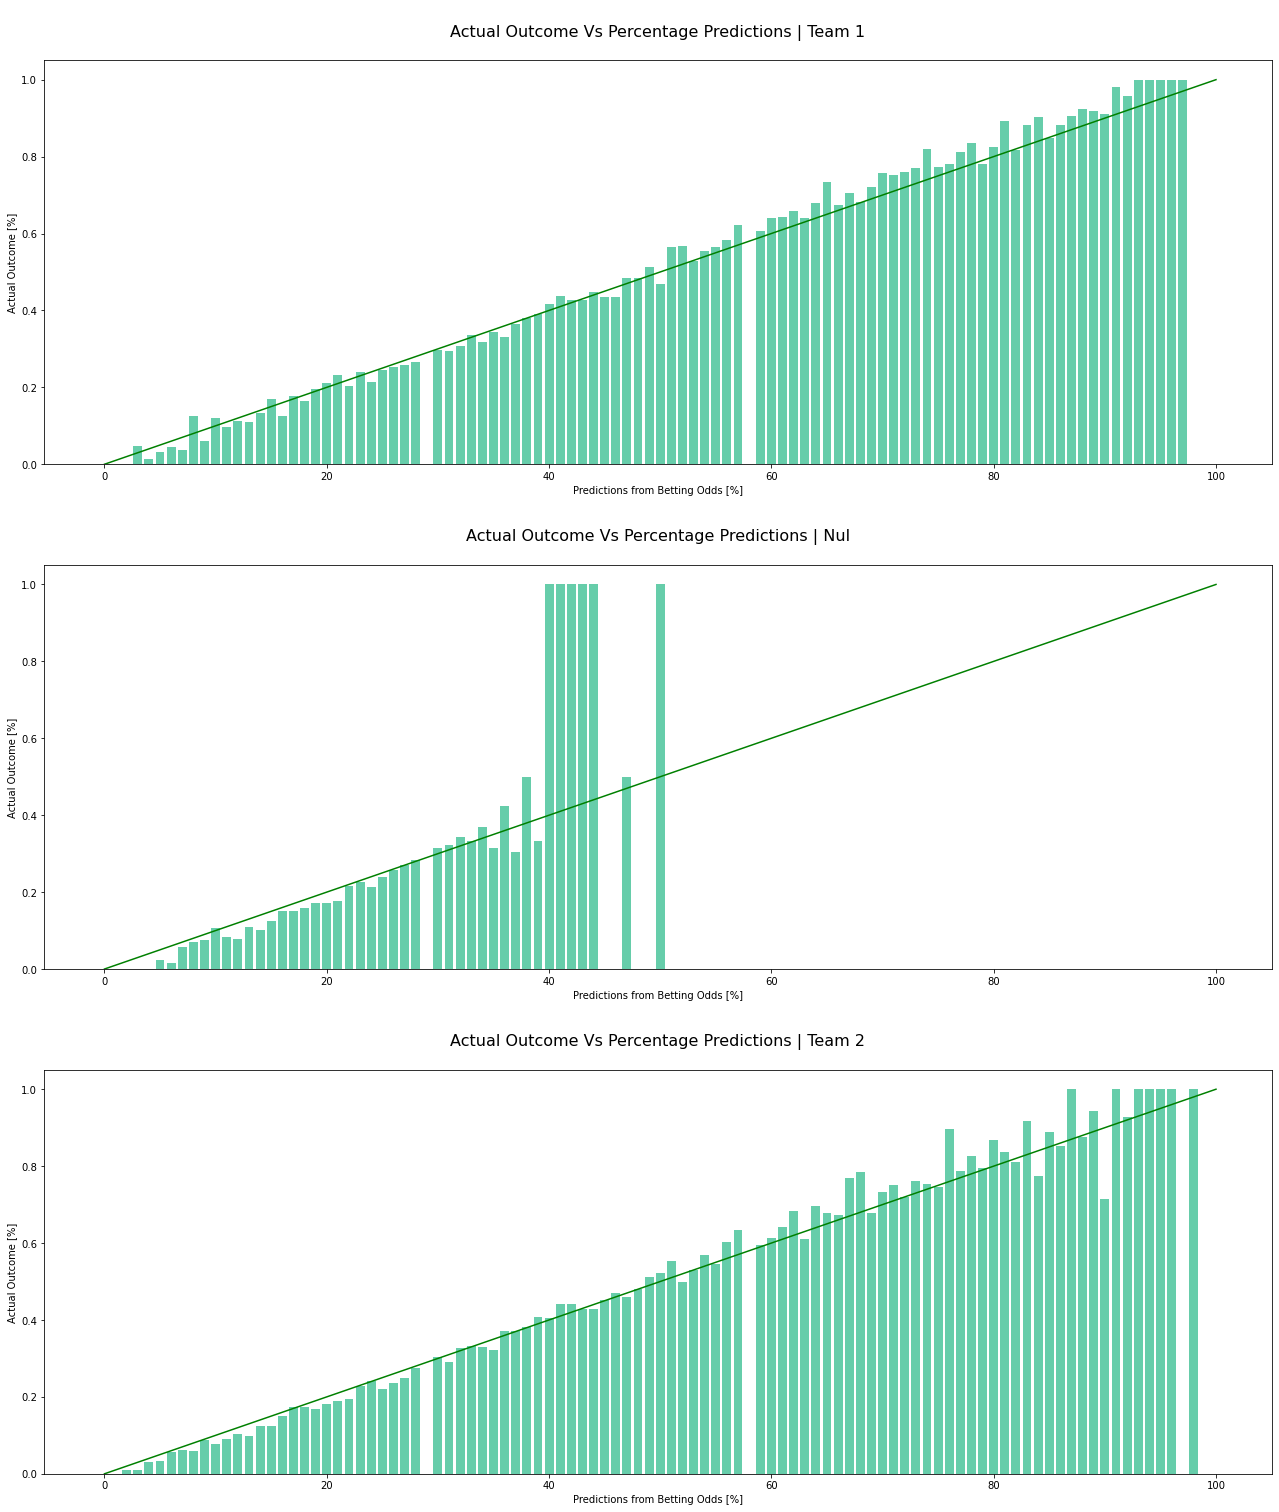

In [16]:
# Actual Outcome of Percentage Predictions | All 3 outcomes: Team 1, nul, Team 2

perc = range(100)    
fontsize = 16

fig, axs = plt.subplots(3, 1, figsize = (22, 26))
axs[0].bar(perc, team_1_outcome_vs_odds, color = 'mediumaquamarine')
axs[0].plot([0, 100], [0, 1], color = 'g')
axs[0].set_title('\nActual Outcome Vs Percentage Predictions | Team 1\n', fontsize = fontsize)
axs[0].set_xlabel('Predictions from Betting Odds [%]')
axs[0].set_ylabel('Actual Outcome [%]')

axs[1].bar(perc, nul_outcome_vs_odds, color = 'mediumaquamarine')
axs[1].plot([0, 100], [0, 1], color = 'g')
axs[1].set_title('\nActual Outcome Vs Percentage Predictions | Nul\n', fontsize = fontsize)
axs[1].set_xlabel('Predictions from Betting Odds [%]')
axs[1].set_ylabel('Actual Outcome [%]')

axs[2].bar(perc, team_2_outcome_vs_odds, color = 'mediumaquamarine')
axs[2].plot([0, 100], [0, 1], color = 'g')
axs[2].set_title('\nActual Outcome Vs Percentage Predictions | Team 2\n', fontsize = fontsize)
axs[2].set_xlabel('Predictions from Betting Odds [%]')
axs[2].set_ylabel('Actual Outcome [%]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

plt.savefig(folder_figure + '\Actual Outcome Vs Percentage from Betting Odds - Team 1, Nul, Team 2.png')
plt.show()

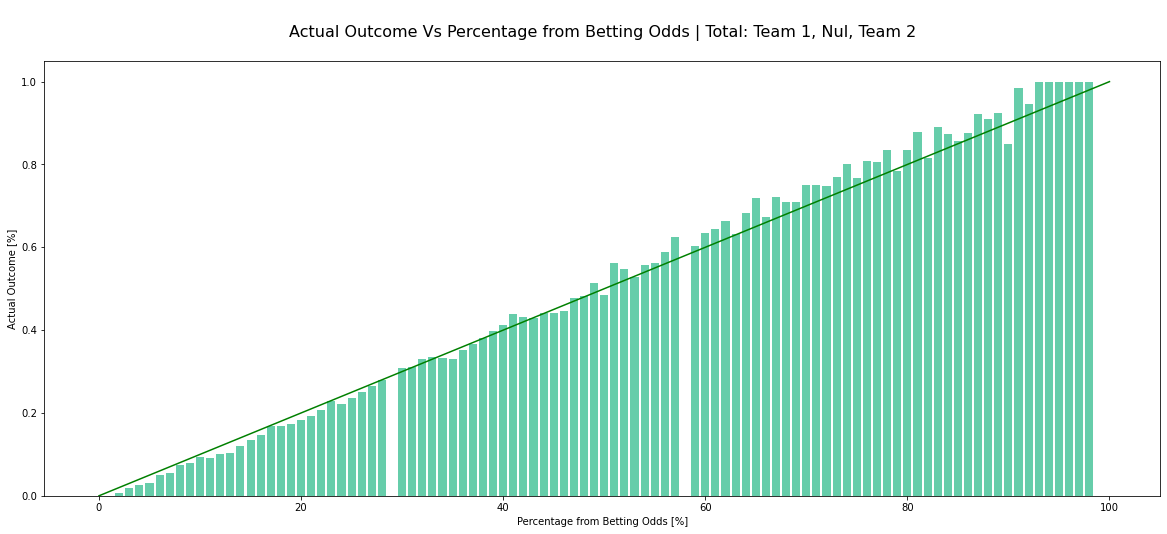

In [17]:
# Actual Outcome of Percentage Predictions | Total for all 3 outcomes: Team 1, nul, Team 2

perc = range(100)    

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(perc, outcome_vs_odds, color = 'mediumaquamarine')
ax.plot([0, 100], [0, 1], color = 'g')
ax.set_title('\nActual Outcome Vs Percentage from Betting Odds | Total: Team 1, Nul, Team 2\n', fontsize = fontsize)
ax.set_xlabel('Percentage from Betting Odds [%]')
ax.set_ylabel('Actual Outcome [%]')

plt.savefig(folder_figure + '\Actual Outcome Vs Percentage from Betting Odds.png')
plt.show()

---

---